In [1]:
import pandas as pd

In [2]:
import numpy as np

In [5]:
df1 = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/bikes_rent.csv")

In [38]:
df2 = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",sep=';')

In [9]:
df3 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",na_values="?",header=None).fillna(0)

In [10]:
df2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


### Вещественные признаки

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
pf = PolynomialFeatures(include_bias=False)
df1_polyn = pf.fit_transform(df1[["atemp","humidity","windspeed"]])
df1_polyn

array([[  1.43950000e+01,   8.10000000e+01,   0.00000000e+00, ...,
          6.56100000e+03,   0.00000000e+00,   0.00000000e+00],
       [  1.36350000e+01,   8.00000000e+01,   0.00000000e+00, ...,
          6.40000000e+03,   0.00000000e+00,   0.00000000e+00],
       [  1.36350000e+01,   8.00000000e+01,   0.00000000e+00, ...,
          6.40000000e+03,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.59100000e+01,   6.10000000e+01,   1.50013000e+01, ...,
          3.72100000e+03,   9.15079300e+02,   2.25039002e+02],
       [  1.74250000e+01,   6.10000000e+01,   6.00320000e+00, ...,
          3.72100000e+03,   3.66195200e+02,   3.60384102e+01],
       [  1.66650000e+01,   6.60000000e+01,   8.99810000e+00, ...,
          4.35600000e+03,   5.93874600e+02,   8.09658036e+01]])

In [24]:
df1_polyn.shape

(10886, 9)

In [25]:
df1[["atemp","humidity","windspeed"]].shape

(10886, 3)

Interaction only - без степеней (x1^2 ...)
include_bias - создавать ли константный признаак

In [26]:
df1 = df1.drop(["atemp","humidity","windspeed"],axis=1)

In [29]:
x = pd.DataFrame(data = df1_polyn,index=df1.index)
df1 = pd.concat([df1,x],axis=1)

In [30]:
df1.head(5)

,datetime,season,holiday,workingday,weather,temp,casual,registered,count,0,1,2,3,4,5,6,7,8
0,2011-01-01 00:00:00,1,0,0,1,9.84,3,13,16,14.395,81.0,0.0,207.216025,1165.995,0.0,6561.0,0.0,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,8,32,40,13.635,80.0,0.0,185.913225,1090.800,0.0,6400.0,0.0,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,5,27,32,13.635,80.0,0.0,185.913225,1090.800,0.0,6400.0,0.0,0.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,3,10,13,14.395,75.0,0.0,207.216025,1079.625,0.0,5625.0,0.0,0.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,0,1,1,14.395,75.0,0.0,207.216025,1079.625,0.0,5625.0,0.0,0.0


### Нелинейные трансформации

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

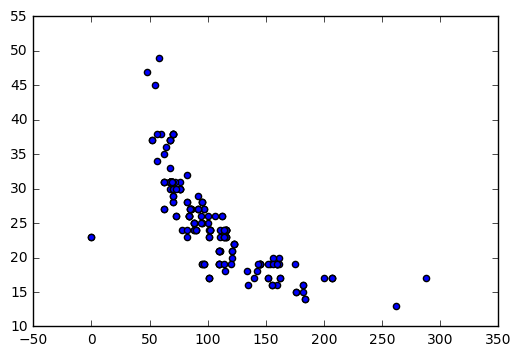

In [32]:
plt.scatter(df3[21],df3[23])

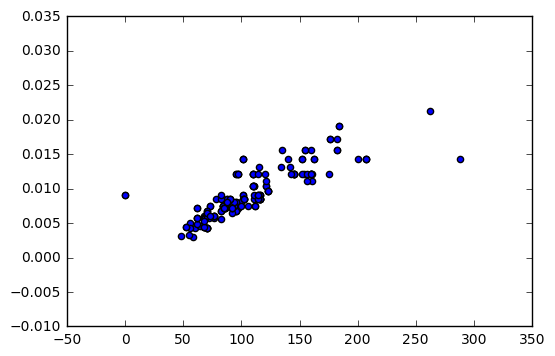

In [36]:
plt.scatter(df3[21],1/(df3[23])**1.5)

np.exp, np.log, **, tanh

In [37]:
df3[24]=1/(df3[23])**1.5

### Бинаризация

(array([  54.,   46.,  177.,  169.,  118.,   70.,   45.,   24.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

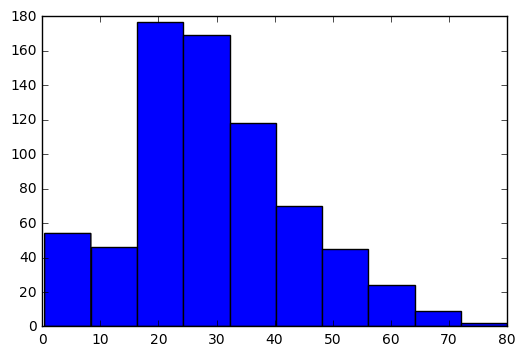

In [39]:
plt.hist(df2["Age"].dropna())

In [40]:
df2["BinAge"] = df2["Age"]<20

### Категриальные признаки

In [44]:
pd.get_dummies(df3,columns = [2,3,6,8]).head()

,0,1,4,5,7,9,10,11,12,13,...,2_volvo,3_diesel,3_gas,6_convertible,6_hardtop,6_hatchback,6_sedan,6_wagon,8_front,8_rear
0,3,0.0,std,two,rwd,88.6,168.8,64.1,48.8,2548,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3,0.0,std,two,rwd,88.6,168.8,64.1,48.8,2548,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0.0,std,two,rwd,94.5,171.2,65.5,52.4,2823,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2,164.0,std,four,fwd,99.8,176.6,66.2,54.3,2337,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2,164.0,std,four,4wd,99.4,176.6,66.4,54.3,2824,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [45]:
df3["New_feature"] = df3[4].astype(str)+"_"+df3[5].astype(str)

In [47]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,casual,registered,count,0,1,2,3,4,5,6,7,8
0,2011-01-01 00:00:00,1,0,0,1,9.84,3,13,16,14.395,81.0,0.0,207.216025,1165.995,0.0,6561.0,0.0,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,8,32,40,13.635,80.0,0.0,185.913225,1090.800,0.0,6400.0,0.0,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,5,27,32,13.635,80.0,0.0,185.913225,1090.800,0.0,6400.0,0.0,0.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,3,10,13,14.395,75.0,0.0,207.216025,1079.625,0.0,5625.0,0.0,0.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,0,1,1,14.395,75.0,0.0,207.216025,1079.625,0.0,5625.0,0.0,0.0


In [48]:
mapping = df1.groupby("season")["temp"].mean()

In [51]:
df1["season_temp"]=df1["season"].map(mapping)

### String

In [52]:
df2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BinAge
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C,False


In [54]:
df2["Name"].map(lambda x: 1 if "Mr" in x else -1 if "Mrs" in x else 0).head()

0    1
1    1
2    0
3    1
4    1
Name: Name, dtype: int64

### timestamp

In [56]:
df1["datetime"].head()

0    2011-01-01 00:00:00
1    2011-01-01 01:00:00
2    2011-01-01 02:00:00
3    2011-01-01 03:00:00
4    2011-01-01 04:00:00
Name: datetime, dtype: object

In [57]:
col = pd.to_datetime(df1["datetime"])

In [58]:
col.dt.year.head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: datetime, dtype: int64

In [60]:
col.dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: datetime, dtype: int64